# Logistic Regression from Scratch with NumPy
---

Welcome to another post of implementing machine learning algorithms! Today, the algorithm that we will be implementing from scratch is **Logistic Regression**. Alongside its belowed sister algorithm linear regression, this one is higly used in machine learning as well, due to its simplicity and robustness. Even though its called logistic *regression*, it's actually a classification algorithm that is used to classify input data into its classes (labels).
    
This powerful machine learning model can be used to answer some questions such as;
* Whether an e-mail is spam or not
* If the customer will churn
* Whether a tumor is benign or malignant

All of the questions above are simply yes-no questions, therefore they can be used to classify input data into two classes. Hence, the term binary classification is used when the data can be categorized into two distinct classes. Obviously, multi-class classification deals with data that has more than two labels (classes). After grasping the ins and outs of logistic regression to make binary classification, transition to a multi-class classification is pretty straight-forward, as a consequence, here, we will deal with data that has two classes only.
    
Remember, that in linear regression we predict numerical values based on the input values and parameters of the model.Here, in logistic regression we can also approach the model as we are trying to predict numbers but this time these numbers correspond to the probability values of input data belonging to a particular class. 

The term logistic in logistic regression is used because this time we are applying another function to the weighted sum of input data and paratemeters of the model and this function is  called logit (sigmoid) function. 

Sigmoid function always outputs values between 0 and 1, and thus can be used to calculate probabilities of input data belonging to a certain class:

$ sigmoid(x) =  1 / (1 + e^{-x})  $

<img src="img/sigmoid.png" width="400"/>
    
Without further ado, let's start writing the code for this implementation. I will explain the code as I go, whenever deemed necessary. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We start off by importing necessary libraries. As always, **NumPy** is the only package that we will use in order to implement the logistic regression algorithm. All the others will only help us with minor issues such as visualizing the data at hand or creating a dataset. Hence, we won't be using already implemented package solutions for logistic regression. 

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Here, we write the code for the aforementioned sigmoid (logit) function. It is important to note that this function can be applied to all of the elements of a `numpy` array individually, simply because we make use of the exponential function from the **NumPy** package.

In [3]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

Next, we write the cost function for logistic regression. Note that the cost function used in logistic regression is different than the one used in linear regression. 

Remember, in linear regression we calculated the weighted sum of input data and parameters and fed that sum to the cost function to calculate the cost. When we plotted the cost function it was seen to be convex, hence a local minimum was also the global minimum.

However, in logistic regression, we apply sigmoid function to the weighted sum which makes the resulting outcome non-linear. If we feed that non-linear outcome to the cost function, what we get would be a non-convex function and we wouldn't be assured to find only one local minimum that is also the global minimum. 

As a result, we use another cost function to calculate the cost which is guaranteed to give one local minimum during the optimization.

In [4]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

Gradient descent implementation here is not so different than the one we used in linear regression. Only difference to be noted is the sigmoid function that is applied to the weighted sum.

In [5]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

While writing out the prediction function, let's not forget that we are dealing with probabilities here. Hence, if the resulting value is above 0.50, we round it up to 1, meaning the data point belongs to the class 1. Consequently, if the probability of a data point belonging to the class 1 is below 0.50, it simply means that it is part of the other class (class 0). Remember that this is binary classification, so we have only two classes (class 1 and class 0).

In [11]:
train = pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Columns: 320 entries, Date to hex_318
dtypes: float64(319), object(1)
memory usage: 10.5+ MB


In [8]:
train.describe()

,hex_000,hex_001,hex_002,hex_003,hex_004,hex_005,hex_006,hex_007,hex_008,hex_009,...,hex_309,hex_310,hex_311,hex_312,hex_313,hex_314,hex_315,hex_316,hex_317,hex_318
count,4290.000000,4290.000000,4290.000000,4290.0,4290.000000,4290.000000,4290.000000,4290.000000,4290.0,4290.0,...,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.0,4290.000000
mean,0.003030,0.000466,0.008858,0.0,0.040793,0.000466,0.000699,0.003730,0.0,0.0,...,0.678788,0.426107,0.006993,0.689744,0.510256,0.007692,0.135897,0.027273,0.0,0.019347
std,0.087664,0.030535,0.147777,0.0,0.271375,0.030535,0.034136,0.083551,0.0,0.0,...,1.285296,1.013441,0.118069,1.159675,1.085744,0.135499,0.575754,0.229452,0.0,0.190344
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,4.000000,2.000000,5.000000,0.0,6.000000,2.000000,2.000000,3.000000,0.0,0.0,...,12.000000,10.000000,3.000000,12.000000,9.000000,4.000000,7.000000,4.000000,0.0,6.000000


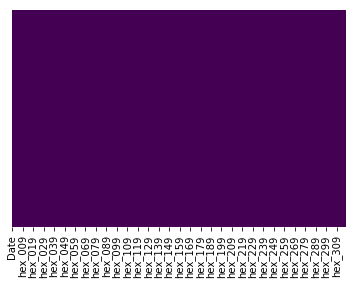

In [9]:
#lets check for missiing data using seaborn to create a heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Age and cabin columns are missing values.
lets consider the Age feature; 
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average age by passenger class.


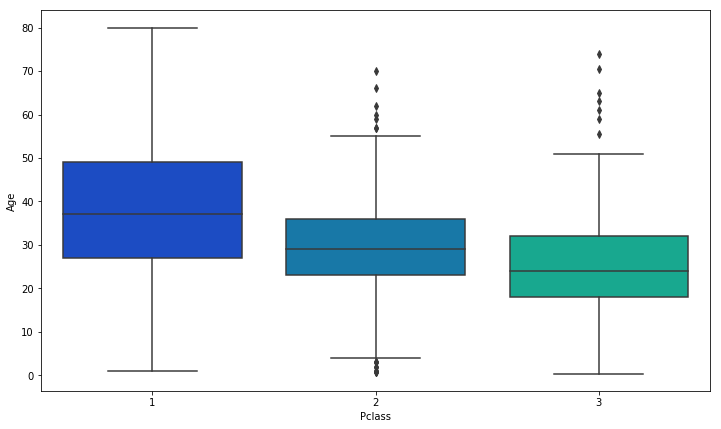

In [12]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

from the boxplot; We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to impute based on Pclass for Age.

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

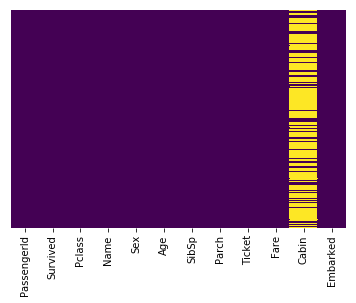

In [21]:
#lets check the heatmap again to check missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#we can now drop the cabin column
train.drop('Cabin', axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Converting Categorical Features such as sex name, embarked, ticket:
We’ll need to convert categorical features to dummy variables using pandas!
this is toenable our machine learning algorithm take in those featues as inputs

In [14]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark],axis=1)

#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

In [16]:
X = X_train
y = y_train

In [21]:
x = np.asarray(X)
y = np.asarray(y)

In [19]:
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
#                              n_clusters_per_class=1, random_state=14)

# y = y[:,np.newaxis]

# sns.set_style('white')
# sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));



In [23]:
print(x)

[[7.58e+02 2.00e+00 1.80e+01 ... 1.00e+00 0.00e+00 1.00e+00]
 [3.11e+02 1.00e+00 2.40e+01 ... 0.00e+00 0.00e+00 0.00e+00]
 [4.70e+02 3.00e+00 7.50e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [7.25e+02 1.00e+00 2.70e+01 ... 1.00e+00 0.00e+00 1.00e+00]
 [4.23e+02 3.00e+00 2.90e+01 ... 1.00e+00 0.00e+00 1.00e+00]
 [6.64e+02 3.00e+00 3.60e+01 ... 1.00e+00 0.00e+00 1.00e+00]]


After coding out the necessary functions, let's create our own dataset with `make_classification` function from `sklearn.datasets`. We create 500 sample points with two classes and plot the dataset with the help of `seaborn` library.

In [28]:
X.shape

(498, 10)

In [27]:
x.shape

(498, 10)

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.29878011]
 [-0.29878011]
 [-6.58775315]
 [-4.11115358]
 [-9.84882326]
 [-2.61996431]
 [-0.02868377]
 [11.3381022 ]
 [-5.32397488]
 [-0.16006444]
 [-0.87897382]] 



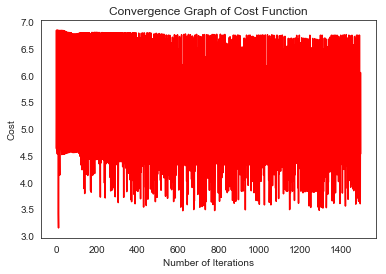

In [37]:
m = len(y)
y =  y.reshape(m, 1)
x = np.hstack((np.ones((m,1)),x))
n = np.size(x,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(x, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(x, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Now, let's run our algorithm and calculate the parameters of our model. Seeing plot, we can now be sure that we have implemented the logistic regression algorithm without a fault, since it decreases with every iteration until the decrease is so minimal that the cost converges to a minimum which is what we want indeed.

In [39]:
y_pred = predict(x, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.606425702811245


In [40]:
b = -0.45293068/0.03334871
b

-13.58165518246433

In [41]:
print (X)

[[  1. 758.   2. ...   1.   0.   1.]
 [  1. 311.   1. ...   0.   0.   0.]
 [  1. 470.   3. ...   0.   0.   0.]
 ...
 [  1. 725.   1. ...   1.   0.   1.]
 [  1. 423.   3. ...   1.   0.   1.]
 [  1. 664.   3. ...   1.   0.   1.]]


After running the algorithm and getting the optimal parameters, we want to know how successful our model is at predicting the classes of our data. For this reason, we use `accuracy_score` function from `sklearn.metrics` to calculate the accuracy.

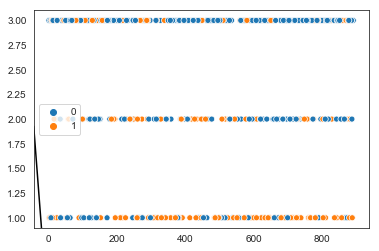

In [42]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");




Now, for the sake of visualization lets plot our dataset along with the decision boundary of our model. We simply calculate the intercept and slope values using the optimal parameters and plot the boundary that classifies the data into two classes. We can see from the plot that the classification is not 100% correct since the separation of classes is not linear naturally. Nevertheless, misclassified points (false positives and false negatives) are really few, so we have done a pretty good job with this implementation of logistic regression.
    
Feel free to go ahead and code all of this once again.
    
But this time, do it on your own.

In [23]:
print(intercept)

[13.58165418]
